#Task:
Mixture of Gaussian, EM-Algorithm
<br>
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets: 

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import multivariate_normal as mvn
from matplotlib.patches import Ellipse
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns; sns.set;
from sklearn.cluster import KMeans

In [ ]:
#from sklearn.mixture import GaussianMixture

##Dataset 1

In [60]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data1 = data[1:, :]
print(data1.shape)
    


(800, 2)


##Dataset 2

In [62]:
    # Make some random data in 2D.
    np.random.seed(150)
    means = np.array([[1.1, 6.5],
                      [2.5, 4.7],
                      #[3.0, 2.6],
                      [3.0, 3.3]])
    covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
                   np.array([[0.35, 0.22], [0.22, 0.20]]),
                   #np.array([[0.06, 0.05], [0.05, 1.30]]),
                   np.array([[0.06, 0.05], [0.05, 1.30]])]
    amplitudes = [4, 1, 3]
    factor = 100

    data = np.zeros((1, 2))
    for i in range(len(means)):
        data = np.concatenate([data,
            np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
data2 = data[1:, :]
print(data2.shape)

(800, 2)


Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

# Results
The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">

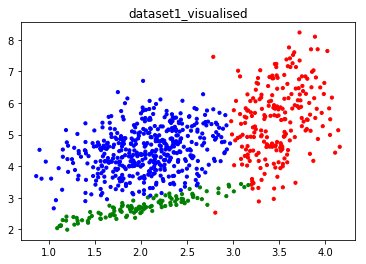

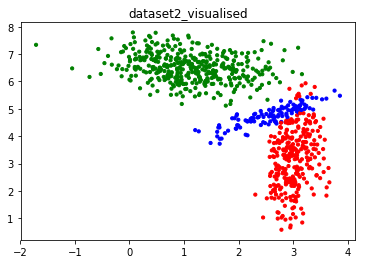

In [108]:
# kmeans = KMeans(3, random_state=0)
# labels = kmeans.fit(data).predict(data)
# plt.scatter(data[:,0],data[:,1],c=labels,s=40,cmap='viridis')

def rgb(labels):
    color = {0:'g',1:'r',2:'b'}
    for i in labels: 
        return [color[i] for i in labels]
# n_colors = 3

def guassian_model_mix(n_component,randomstate,data):
    gmm = GMM(n_components=n_colors, random_state=randomstate).fit(data)
    labels = gmm.predict(data)
#     print(labels)
    plt.scatter(data[:,0],data[:,1],c= rgb(labels),s=10)
    plt.show()
    return gmm

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle,fill=False, linewidth=3))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=rgb(labels), s=10, zorder=1)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
#     ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        

plt.title("dataset1_visualised")
gmm_1 = guassian_model_mix(3, 40, data1)
plt.title("dataset2_visualised")
gmm_2 = guassian_model_mix(3, 40, data2)


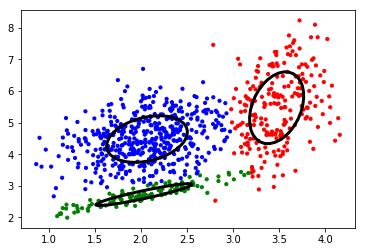

In [109]:
print("Plotting ellipsoid for data1")
plot_gmm(gmm_1, data1)

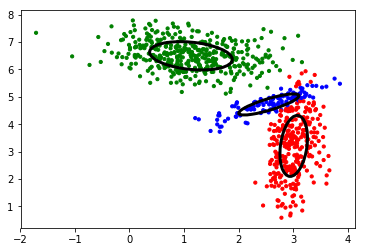

In [110]:
print("Plotting ellipsoid for data2")
plot_gmm(gmm_2, data2)

Reference : https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html